<a href="https://colab.research.google.com/github/Amaresh1204/Text-to-Image-Convertor/blob/main/Text_Image_Converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEXT-TO-IMAGE CONVERTER

### Install libraries

In [ ]:
! nvidia-smi
! pip install min-dalle

Sun Oct 29 16:00:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
dtype = "float32" #@param ["float32", "float16", "bfloat16"]
from IPython.display import display, update_display
import torch
from min_dalle import MinDalle

model = MinDalle(
    dtype=getattr(torch, dtype),
    device='cuda',
    is_mega=True,
    is_reusable=True
)

using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


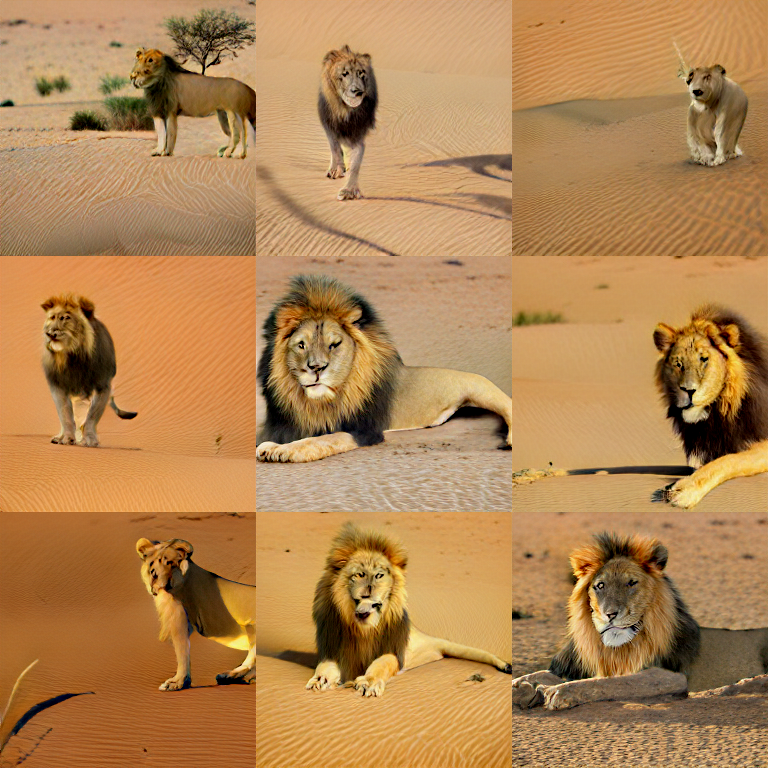

CPU times: user 47.6 s, sys: 804 ms, total: 48.4 s
Wall time: 52.9 s


In [ ]:
%%time

text = "" #@param {type:"string"}
progressive_outputs = True #@param {type:"boolean"}
seamless = False #@param {type:"boolean"}
grid_size = 3 #@param {type:"integer"}
temperature = 1 #@param {type:"slider", min:0.01, max:16, step:0.01}
supercondition_factor = 16 #@param {type:"number"}
top_k = 128 #@param {type:"integer"}

image_stream = model.generate_image_stream(
    text=text,
    seed=-1,
    grid_size=grid_size,
    progressive_outputs=progressive_outputs,
    is_seamless=seamless,
    temperature=temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)

is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False